<a href="https://colab.research.google.com/github/timsetsfire/wandb-examples/blob/main/colab/model_registry_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install wandb -qqq

     |████████████████████████████████| 1.8 MB 5.0 MB/s 
     |████████████████████████████████| 181 kB 43.5 MB/s 
     |████████████████████████████████| 157 kB 45.3 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 157 kB 57.8 MB/s 
     |████████████████████████████████| 157 kB 55.3 MB/s 
     |████████████████████████████████| 157 kB 58.4 MB/s 
     |████████████████████████████████| 156 kB 54.1 MB/s 


In [ ]:
import wandb

## Enable Model Registy 

In your Profile -> Settings, enable Model Registry in the W&B Beta Features section 
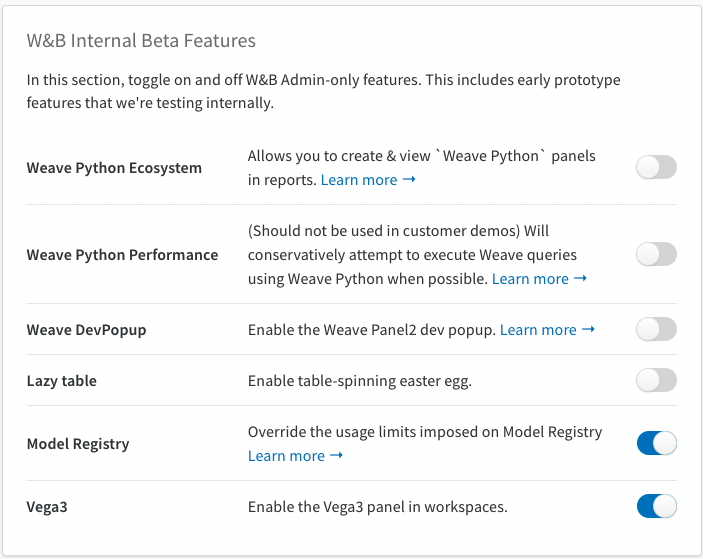

## Model Registry

You can get to your model registry by going to 
[your-wandb-url/registry]().  

## Create a Registered Model 

Go to your URL and "Create a Registered Model".  Depending on the version of W&B you are running, you may see "Create a Model Collection". 

The Model Registry houses **Registered Models**, which manage references to the most important models within a team’s project. Let’s create one which we will later link model versions to.

When you clikc "Create Registered Model" or "Create Model Collection", you will be asked to 
* Owning Entity - entity is either a user name or a team name.  Pick the entity that will own this.
* Owning Project -> any project can "own" the model, but we recommend to select `model-registry`.  You can use this project to curate ALL model artifacts which have been added to a Registered Model.  
* Model Name -> name given to the registry element


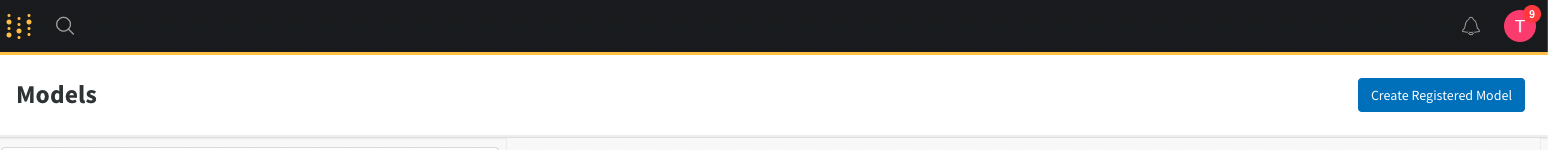

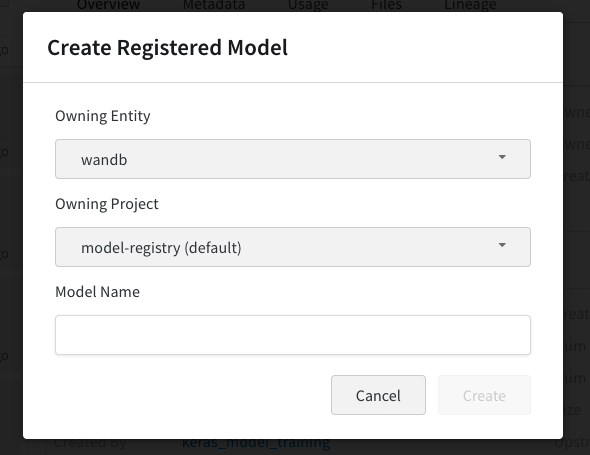


Once you have created the registered Model, now it is time to link a model artifact to the registered model.  

## Workflow

The workflow at present is as follows 
* create a model artifact in your script.  This will utilize the `wandb.Artifact`.  
* log the model artifact via `wandb.log_artifact`
* Register the model artifact by "linking" the model artifact to the model registry element via `wandb.link_artifact`.  

This workflow will change in the future as we add more convenient methods to create, link, and use model artifacts.  For example, the current workflow expects you to serialize the model, whereas in the the beta workflows, we handle serialization of models for a limited number of frameworks.   

## Example Usage

This example assumes that a model has already been registered via UI. 


1. Train a model(s) and create an artifact, which is logged during the training experiment
2. Link the artifact to your entry in Model Registry

In [10]:
## training experiment
with wandb.init(project = "your-project", job_type = "training") as run:
  ## train a model and write it to disk
  model_artifact = wandb.Artifact(name = "model-name", type = "model")
  # model_artifact.add_dir("/path/to/model_dir")
  ## or 
  model_artifact.add_file("/path/to/model_file")
  run.log_artifact(model_artifact)

with wandb.init(project = "your-project", job_type = "register-model") as run:
  model_artifact = wandb.use_artifact(model_artifact.wait())
  run.link_artifact(model_artifact, f'tim-w/model-registry/{registered_model_name}', aliases = ["latest", "staging", "needs-validation"])

